In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Data Science and Analytics/WTF Data Science and AI/Datasets/ML, DL, NLP/employee_churn_data.csv')

In [6]:
# checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [7]:
# checking for null values
df.isna().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [8]:
# checking for duplicated entries
df.duplicated().sum()

0

__The dataset is clean__

In [6]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
# checking the different departments
df.department.unique()

array(['operations', 'support', 'logistics', 'sales', 'IT', 'admin',
       'engineering', 'marketing', 'finance', 'retail'], dtype=object)

In [ ]:
# churn rate
df.left.value_counts(normalize= True)

left
no     0.708176
yes    0.291824
Name: proportion, dtype: float64

__29% of the employees left the organisation__

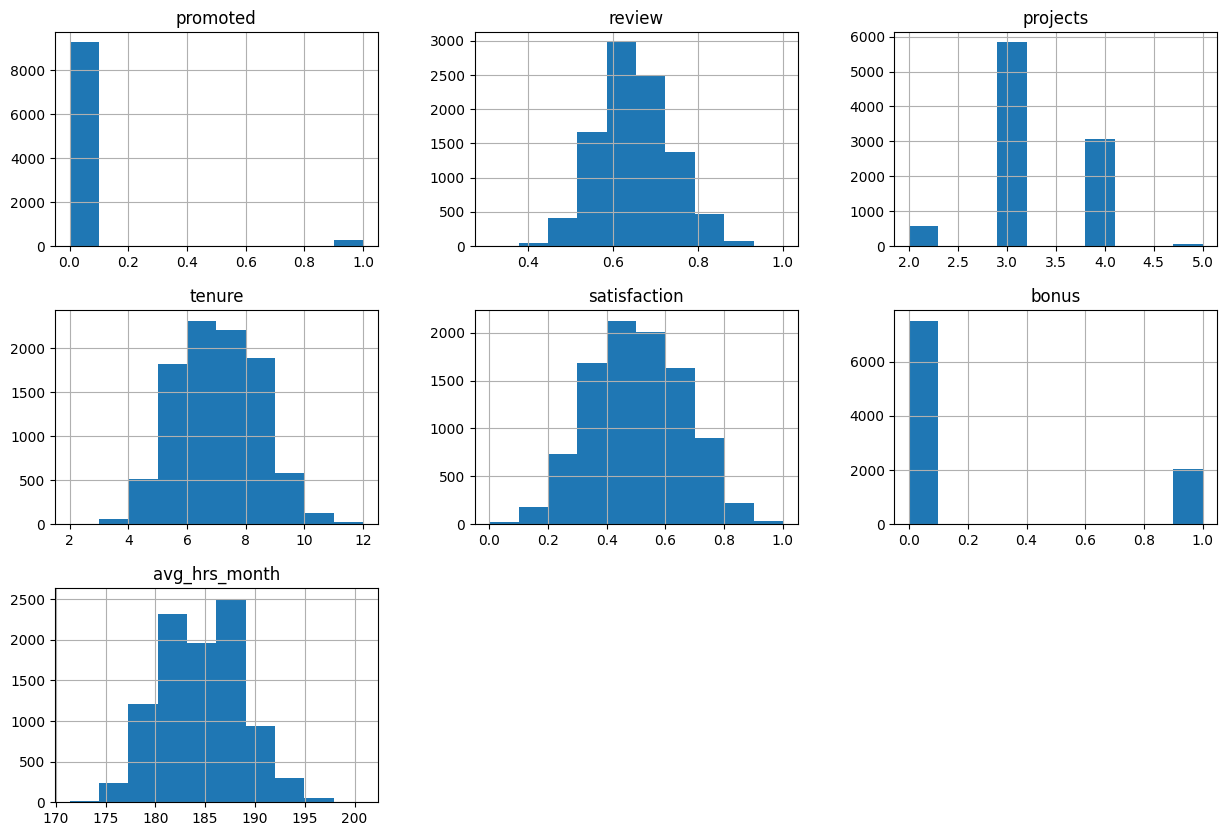

In [ ]:
# data distribution
df.hist(figsize=(15,10), bins=10)
plt.show()

__INSIGHTS__

Almost 10,000 employees were not promoted, only about 1000 got promoted. This can be a major reason for employees leaving the organization.

Almost 8000 employees did not get a bonus, only about 2000 got bonuses. This can contribute significantly to the churn rate.

Majority of the employees have review scores of betwen 0.6 and 0.7 which is quite moderate, only few had very high review scores of between 0.8 and 1.0.

Majority of the employees worked on 3 to 4 projects, and stayed in the organisation for between 6 and 8 years.

Most of the employees have satisfaction scores of between 0.4 and 0.6. This implies that many of the employees were not highly satisfied with their work in the organisation





### EDA

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train , test = train_test_split(df, test_size=0.1, random_state=42)

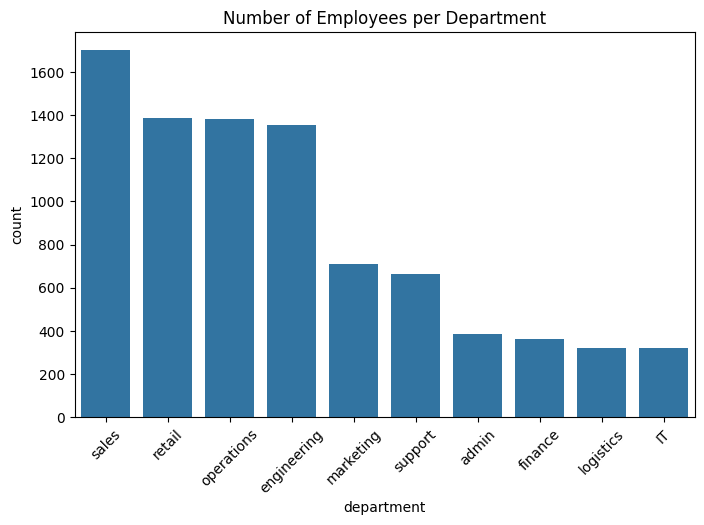

In [ ]:
# no of employee per department
plt.figure(figsize= (8,5))
sns.countplot(data = train, x = 'department', order= train.department.value_counts(ascending= False).index)
plt.title('Number of Employees per Department')
plt.xticks(rotation= 45)
plt.show()

__bonus__

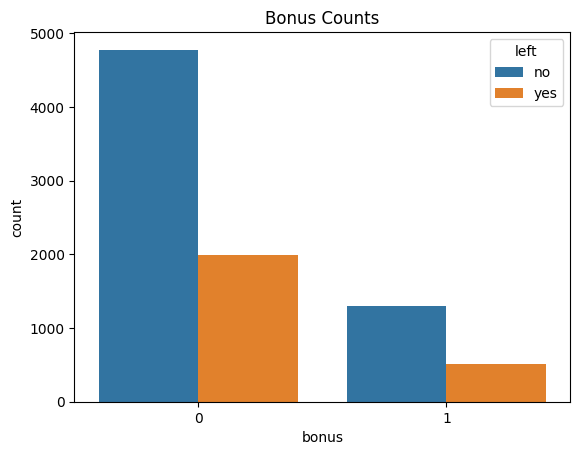

In [ ]:
sns.countplot(data = train, x = 'bonus', hue = 'left')
plt.title('Bonus Counts')
plt.show()

__About 40% of those who did not get a bonus left the organisation.
 Almost the same percentage of those who got bonuses left as well__

__Promoted__

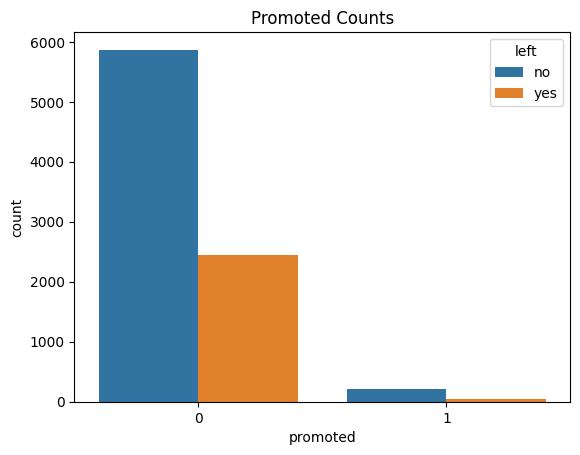

In [ ]:
sns.countplot(data = train, x = 'promoted', hue = 'left')
plt.title('Promoted Counts')
plt.show()

__About 40% of those who didn't get promoted left the organization. Almost half of those who got promoted left too__

__Getting promoted and getting bonuses does not seem to be reason enough for employees to stay in the organisation__

__Satisfaction__

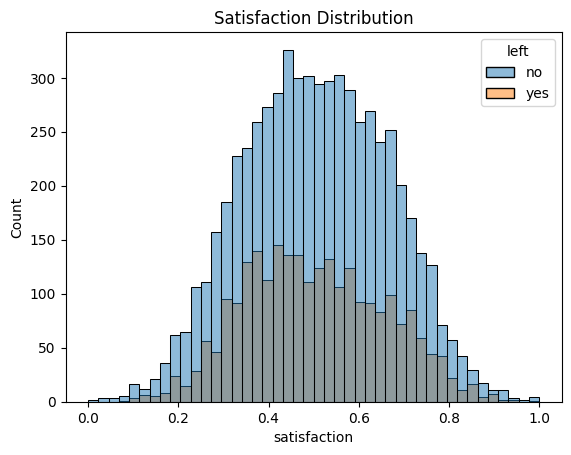

In [ ]:
sns.histplot(data = train, x = 'satisfaction', hue= 'left')
plt.title('Satisfaction Distribution')
plt.show()

__Salary per Departmrnt__

In [ ]:
train.groupby('department')['salary'].value_counts()

department   salary
IT           medium     227
             high        56
             low         39
admin        medium     279
             high        62
             low         45
engineering  medium     957
             high       208
             low        190
finance      medium     250
             high        58
             low         52
logistics    medium     232
             high        46
             low         44
marketing    medium     468
             low        124
             high       119
operations   medium     959
             high       213
             low        208
retail       medium     961
             high       217
             low        209
sales        medium    1161
             high       280
             low        259
support      medium     452
             high       124
             low         87
Name: count, dtype: int64

__The highest number of employees across all the departments earn medium salaries__

In [11]:
train.left.replace({'no': '0', 'yes': '1'}, inplace= True)

In [12]:
train.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
7023,retail,0,0.665114,3,medium,7.0,0.386127,0,185.937141,0
4042,sales,0,0.827388,4,low,5.0,0.252723,0,178.781352,1
7492,sales,0,0.722707,3,low,8.0,0.410461,1,188.772863,0
795,engineering,0,0.656461,4,medium,5.0,0.580161,0,179.993125,0
4960,finance,0,0.700482,3,high,9.0,0.559702,0,192.396305,0


In [13]:
train.left = pd.to_numeric(train.left)

In [ ]:
train.corr(numeric_only= True)

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
promoted,1.000000,-0.003870,0.004326,-0.000142,-0.012271,0.000268,-0.004074,-0.037180
review,-0.003870,1.000000,0.000162,-0.187881,-0.341218,-0.004384,-0.200404,0.304528
projects,0.004326,0.000162,1.000000,0.019228,0.002006,0.001846,0.018921,-0.007606
tenure,-0.000142,-0.187881,0.019228,1.000000,-0.149708,0.001139,0.978557,0.010194
satisfaction,-0.012271,-0.341218,0.002006,-0.149708,1.000000,0.000620,-0.145632,-0.006160
bonus,0.000268,-0.004384,0.001846,0.001139,0.000620,1.000000,0.000335,-0.009433
avg_hrs_month,-0.004074,-0.200404,0.018921,0.978557,-0.145632,0.000335,1.000000,0.010090
left,-0.037180,0.304528,-0.007606,0.010194,-0.006160,-0.009433,0.010090,1.000000


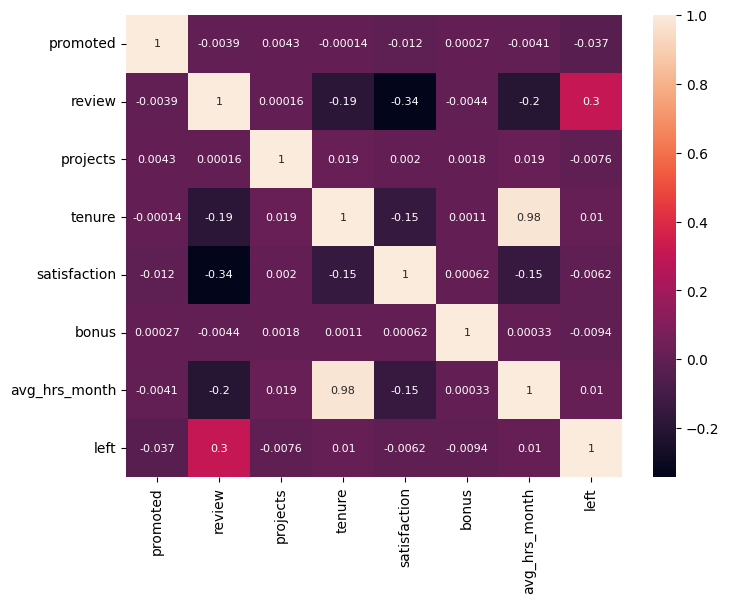

In [ ]:
plt.figure(figsize= (8,6))
sns.heatmap(train.corr(numeric_only= True), annot= True, annot_kws= {'size': 8})
plt.show()

__There is a correlation between the review scores obtained and the churn rate. That means if the employees are not satisfied with their review scores, they might leave__

In [14]:
left_df = train[train.left == 1]  # those who left the organization
stayed_df = train[train.left == 0] # those who stayed

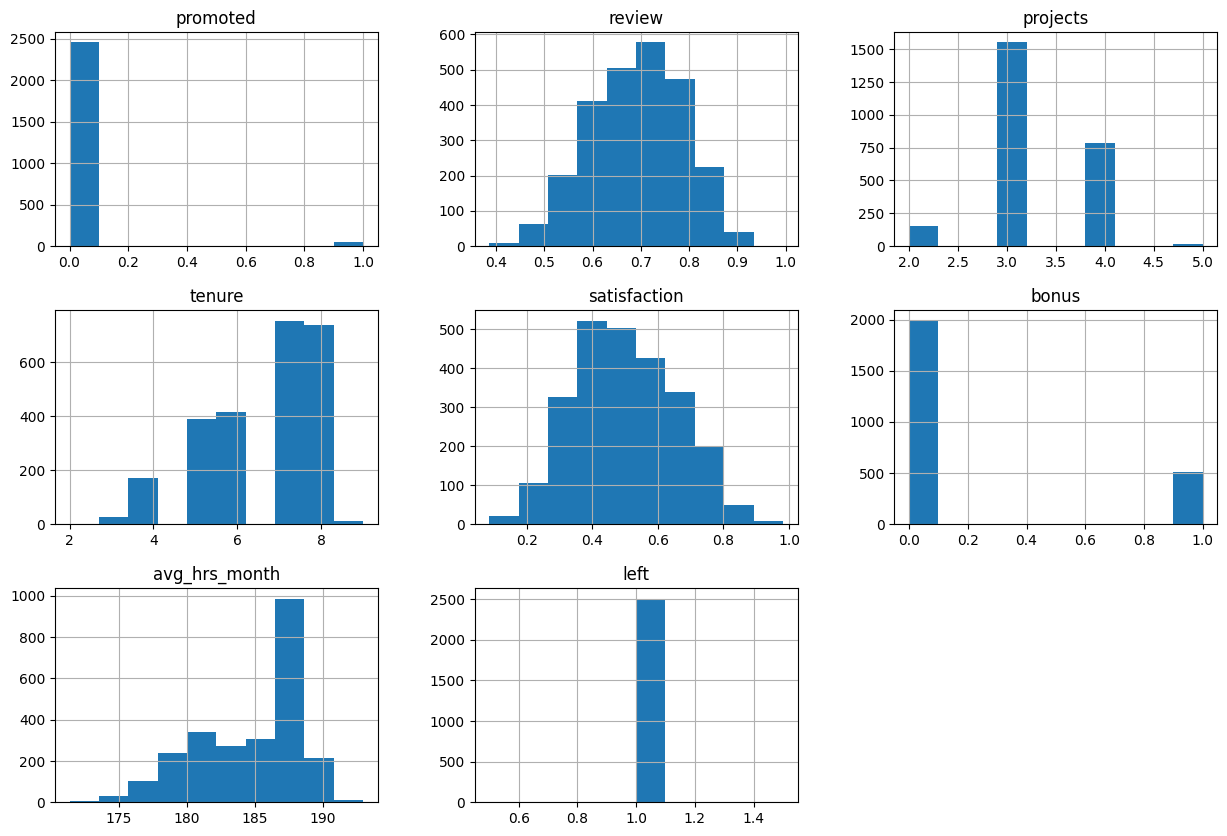

In [ ]:
# The Data Distribution of Employees who LEFT the Organization
left_df.hist(figsize=(15,10), bins=10)
plt.show()

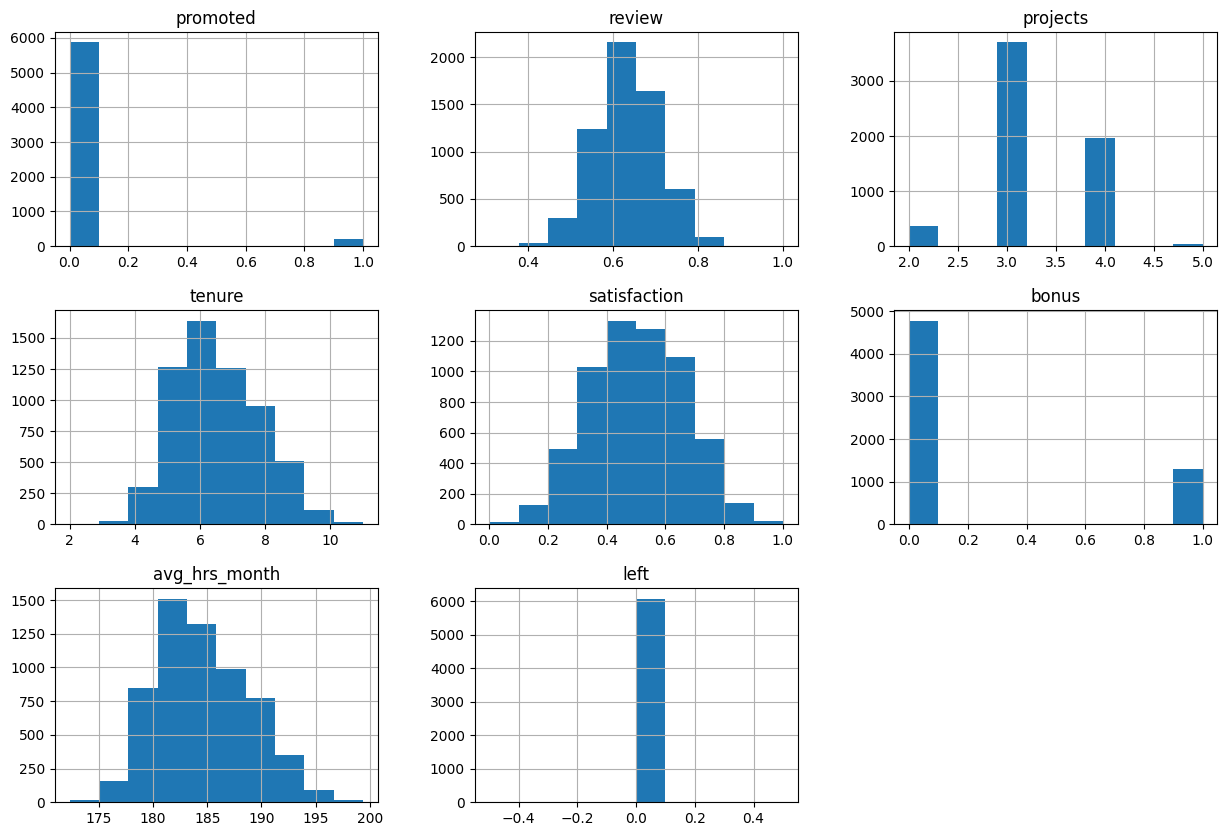

In [ ]:
# The Data Distribution of Employeees who STAYED with the organization
stayed_df.hist(figsize=(15,10), bins=10)
plt.show()

__INSIGHTS__

Looking at the distribution of employees who stayed and those who left:

1. Those who left the organization have higher review scores (about 0.7) than those who stayed, who have review scores of about 0.6. It can also be observed that those who left worked for longer hours than those who stayed. With majority of those who left working between 185 and 190 hours, while those who stayed work between 180 and 185 hours.

 This can suggest that because of their better performance, those who left were probably overworked, and this could have resulted in their leaving the organization.

2. It can be obseved also that those who left had worked for about 8 years in the organization, while those who stayed have only worked for about 6 years.

3. From the satisfaction score, both categories of employees have low satisfaction score of between 0.4 and 0.6. This should be a source of concern, because since those who left spent longer years in the organization before leaving, it is possible that even those who are currently staying might still leave.

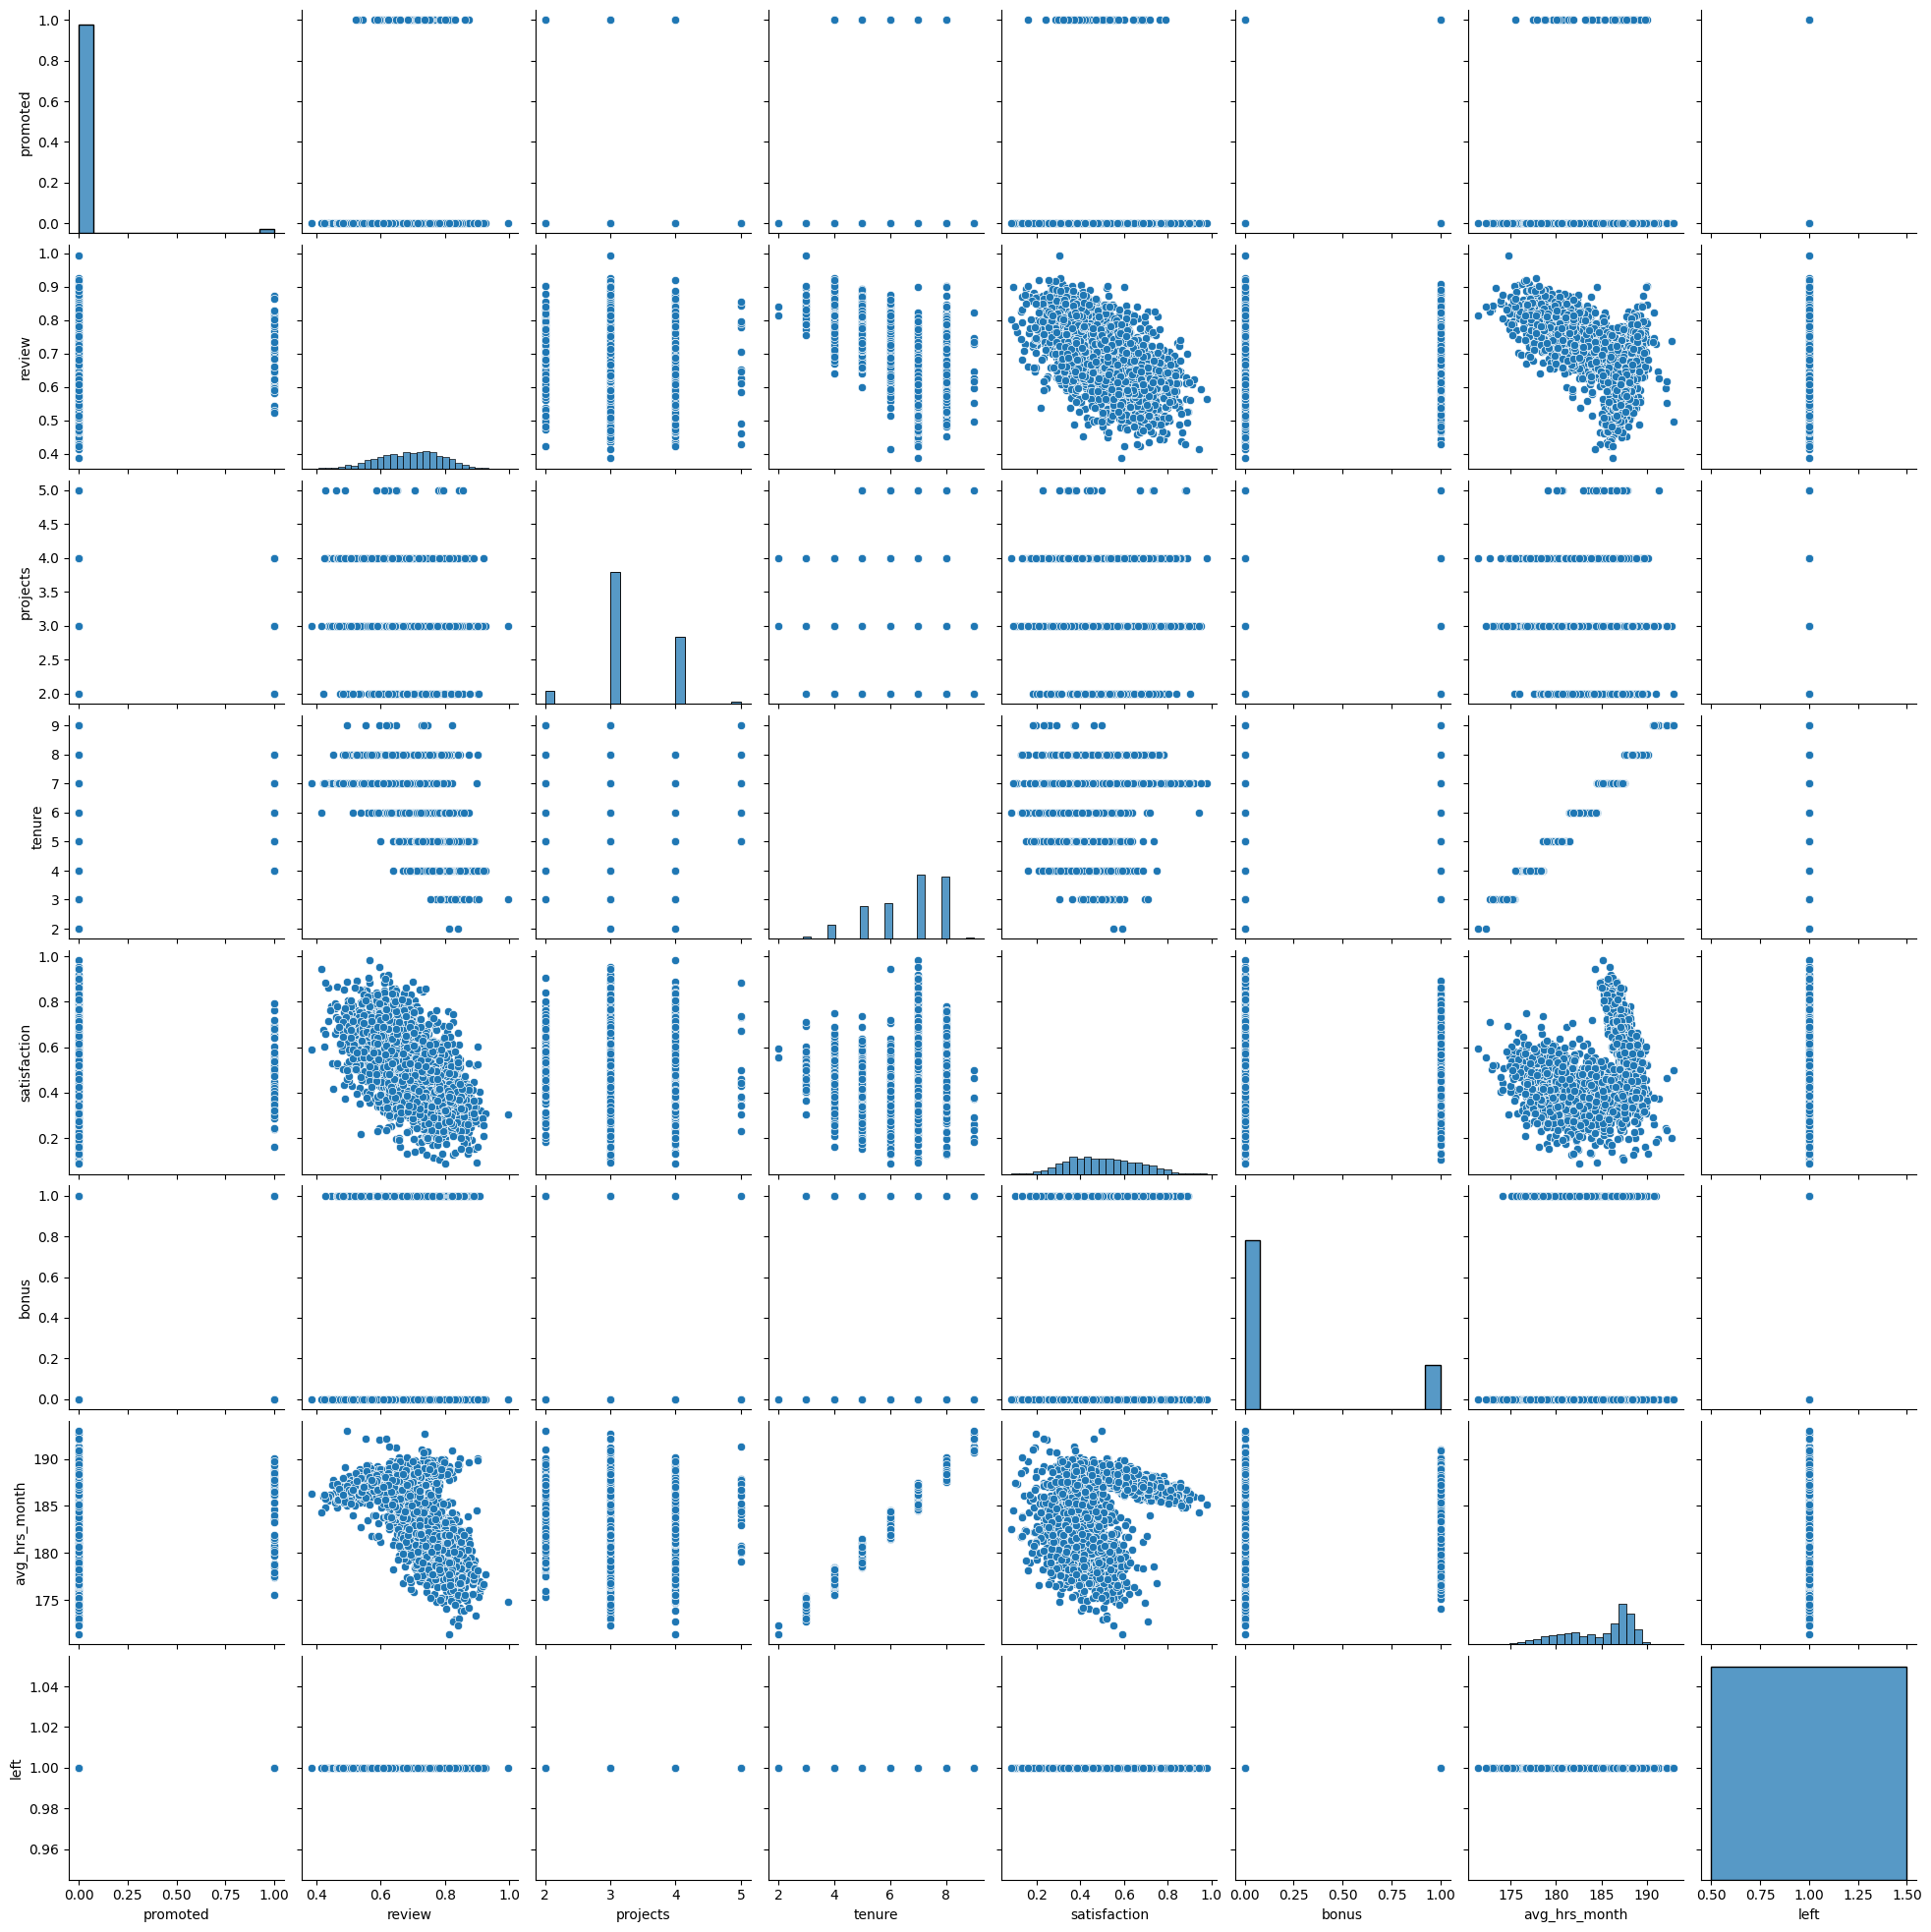

In [ ]:
# pairplot showing the relationship between all the numerical columns
sns.pairplot(data= left_df)
plt.show()

__INSIGHTS__

1.  There is a positive relationship between average hours per month and tenure(number of years spent in the company). It can be observed that the longer people stay in the company, their average work hours increase. This could be a reason why those who had stayed longer in the organization left.

2.  There is a negative relationship between review and satisfaction score. Those with higher review scores have lower satisfaction scores. This could be related to the earlier insights that those with






In [ ]:
# average review per department
left_df.groupby('department')['review'].mean().sort_values(ascending= False)

department
logistics      0.705211
finance        0.704280
marketing      0.697904
operations     0.694047
sales          0.692385
engineering    0.690891
retail         0.688260
support        0.686130
admin          0.683912
IT             0.683016
Name: review, dtype: float64

In [ ]:
# churn rate per department
left_df.groupby('department')['left'].count().sort_values(ascending= False)

department
sales          478
retail         428
operations     396
engineering    392
marketing      221
support        188
admin          108
logistics      101
finance         98
IT              96
Name: left, dtype: int64

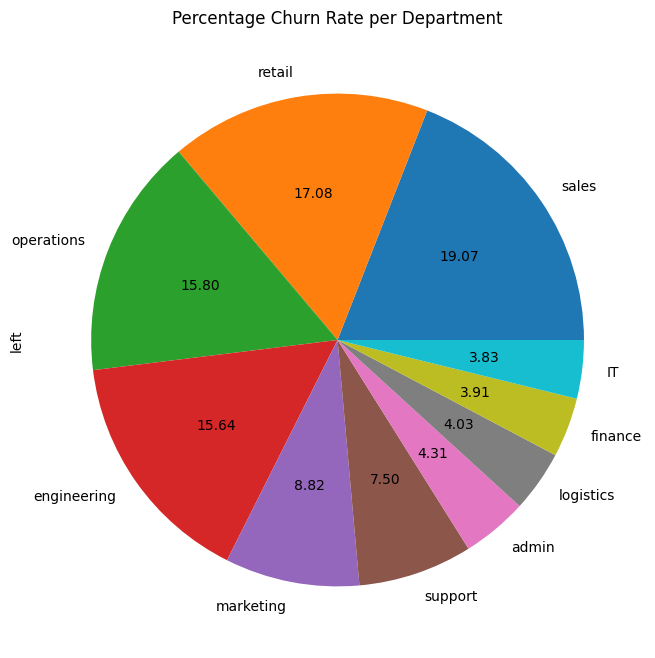

In [21]:
# showing the percentage churn rate per department
plt.figure(figsize= (10,8))
plt.title('Percentage Churn Rate per Department')
left_df.groupby('department')['left'].count().sort_values(ascending= False).plot(kind= 'pie', autopct = '%.2f')
plt.show()


__The organization has the highest value of employee churn coming from the Sales, Retail, Operations and Engineering departments. From earlier analysis, it can also be noted that these are the departments with the highest number of employees in the organization__



__RECOMMENDATIONS__

1.  As employees spend longer years in the organization, their work hours should be reviewed to ensure that they are not being overworked.

2.  The organization should consider reevaluating the metrics being used to assign the review scores, because it is bothersome that those with higher review scores have lower satisfaction scores.

3.  The organization should pay close attention to evaluating the level of job satisfaction of their staff, especially as they are getting closer to the 6-8 year mark.

4.  The organization should consider carrying out a survey to gather more data targeted at finding out specific reasons why the satisfaction score is currently so low.

5.  Closer attention should be paid to the sales, retail, operation, engineering and marketing departments as the greater percentage of churn is from these departments.



__PREPROCESSING THE DATA FOR MODELING__

__Feature Scaling__

In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:
scaler = StandardScaler()

In [16]:
cols_to_scale = ['avg_hrs_month', 'tenure', 'projects']

In [17]:
train[cols_to_scale] = scaler.fit_transform(train[cols_to_scale])

### Categorical encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [20]:
one_encoder = OneHotEncoder()
ord_encoder = OrdinalEncoder()

In [21]:
# department
department = train.department.values.reshape(-1,1)

In [22]:
department = one_encoder.fit_transform(department).toarray()

In [ ]:
department

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [23]:
cats = one_encoder.categories_[0]
cats

array(['IT', 'admin', 'engineering', 'finance', 'logistics', 'marketing',
       'operations', 'retail', 'sales', 'support'], dtype=object)

In [24]:
train[cats] = department
train

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,IT,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
7023,retail,0,0.665114,-0.473008,medium,0.315209,0.386127,0,0.309516,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4042,sales,0,0.827388,1.254446,low,-1.098786,0.252723,0,-1.417974,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7492,sales,0,0.722707,-0.473008,low,1.022207,0.410461,1,0.994092,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
795,engineering,0,0.656461,1.254446,medium,-1.098786,0.580161,0,-1.125438,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4960,finance,0,0.700482,-0.473008,high,1.729204,0.559702,0,1.868832,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,retail,0,0.615988,1.254446,high,0.315209,0.469655,0,0.374242,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5191,sales,0,0.649485,1.254446,medium,0.315209,0.386722,0,0.389056,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,retail,0,0.571402,1.254446,medium,0.315209,0.449136,0,0.122640,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,finance,0,0.656328,-0.473008,medium,-1.098786,0.516865,0,-1.089913,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
train.drop(columns= 'department' , inplace= True)

In [26]:
# salary
salary = train.salary.values.reshape(-1,1)
train.salary = ord_encoder.fit_transform(salary)
train.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,IT,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
7023,0,0.665114,-0.473008,2.0,0.315209,0.386127,0,0.309516,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4042,0,0.827388,1.254446,1.0,-1.098786,0.252723,0,-1.417974,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7492,0,0.722707,-0.473008,1.0,1.022207,0.410461,1,0.994092,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
795,0,0.656461,1.254446,2.0,-1.098786,0.580161,0,-1.125438,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4960,0,0.700482,-0.473008,0.0,1.729204,0.559702,0,1.868832,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
 # x, y
x_train = train.drop(columns= 'left')
y_train = train.left
x_test = test.drop(columns= 'left')
y_test = test.left

__LogisticRegression__

In [29]:
clf = LogisticRegression()

In [30]:
clf.fit(x_train, y_train)

LogisticRegression()

__Processing the test data__

In [31]:
test.left.replace({'no': '0', 'yes': '1'}, inplace= True)
test.left = pd.to_numeric(test.left)

In [32]:
# feature scaling
cols_to_scale = ['avg_hrs_month', 'tenure', 'projects']
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

In [33]:
# encoding the test data
department = test.department.values.reshape(-1,1)
department = one_encoder.transform(department).toarray()
test[cats] = department
test.drop(columns= 'department', inplace= True)

In [34]:
# ordinal encoding
salary = test.salary.values.reshape(-1,1)
test.salary = ord_encoder.transform(salary)

In [35]:
test.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,IT,admin,engineering,finance,logistics,marketing,operations,retail,sales,support
3833,0,0.743258,-0.473008,2.0,-0.391788,0.353143,0,-0.363996,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4215,0,0.773437,-0.473008,2.0,-0.391788,0.380894,0,-0.590333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8277,0,0.371396,-0.473008,2.0,0.315209,0.713355,0,0.420829,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1578,0,0.668354,-0.473008,2.0,-1.098786,0.669354,0,-0.907656,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6341,0,0.715974,1.254446,2.0,0.315209,0.383150,1,0.421503,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
predY = clf.predict(x_test)

In [39]:
confusion_matrix(y_test, predY)

array([[643,  33],
       [221,  57]])

In [41]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           0       0.74      0.95      0.84       676
           1       0.63      0.21      0.31       278

    accuracy                           0.73       954
   macro avg       0.69      0.58      0.57       954
weighted avg       0.71      0.73      0.68       954



In [ ]:
test.left.value_counts()

left
0    676
1    278
Name: count, dtype: int64

__There is an imbalanced data problem. The classifier overfits the class of those who stayed in the organization. The data needs to be resampled. we will undersample those who stayed, since we are more interested in those who left__

In [42]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [43]:
Counter(y_train)
# 0 = employees who stayed
# 1 = employees who left

Counter({0: 6080, 1: 2506})

In [44]:
under_sampler = RandomUnderSampler()

In [45]:
# undersampling the data
x_train_res, y_train_res = under_sampler.fit_resample(x_train, y_train)

In [46]:
Counter(y_train_res)

Counter({0: 2506, 1: 2506})

In [47]:
clf.fit(x_train_res, y_train_res)

LogisticRegression()

In [48]:
predY = clf.predict(x_test)

In [49]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       676
           1       0.44      0.71      0.54       278

    accuracy                           0.65       954
   macro avg       0.64      0.67      0.63       954
weighted avg       0.72      0.65      0.67       954



__RandomForest__

In [50]:
rf_clf = RandomForestClassifier(max_depth= 15, n_estimators=200)

In [51]:
rf_clf.fit(x_train_res, y_train_res)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [52]:
predY = rf_clf.predict(x_test)

In [53]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       676
           1       0.68      0.84      0.75       278

    accuracy                           0.84       954
   macro avg       0.80      0.84      0.82       954
weighted avg       0.86      0.84      0.84       954



__Hyperparameter Tuning__

In [ ]:
# this was used to determine the best parameters for the model
grid_clf = GridSearchCV

In [ ]:
param = {'n_estimators': [100, 200, 300], 'criterion': ['gini' , 'entropy'] , 'max_depth': [5 , 10, 15]}

In [ ]:
grid_clf = GridSearchCV(rf_clf, param)

In [ ]:
grid_clf.fit(x_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]})

In [ ]:
grid_clf.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}